# PVT

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import glob


In [2]:
home_dir = str(Path.home())
# data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')
data_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/'
results_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/pvt/'

In [5]:
pvt_files = glob.glob(data_dir + 'PVT/[1-2]*/2*/data.raw')
print(len(pvt_files))
pvt_files

20


['/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10011/20191024_1719_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10012/20191018_1623_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10014/20191111_1747_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10023/20191111_1434_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10024/20191105_1549_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10025/20191205_1456_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10033/20191107_1526_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10035/20200207_1535_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10038/20200122_1029_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10045/20191204_1234_001/data.raw',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/10049/20191202_1143_002/data.raw',
 '/Users/mcmahonmc/Bo

In [4]:
pvt_files_remote = glob.glob(data_dir + 'PVT/PVT_remote/*.csv')
print(len(pvt_files_remote))
pvt_files_remote

35


['/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-07-14_13h36.49.614.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-07-24_17h39.37.764.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-07-24_17h42.15.908.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-07-30_10h37.21.716.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-07-30_18h42.24.508.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-08-04_09h56.10.749.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-08-04_10h40.32.750.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/PVT/PVT_remote/PARTICIPANT_PVT builder_2020-08-11_08h20.36.110.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/dat

In [6]:
pvt = pd.read_csv(pvt_files[3], sep = ",", header = 0, names = ['id', 'isi', 'it', 'sp', 'st', 'rt', 'err', 'bp', 'fs', 'nr'], dtype = 'float')
pvt[pvt['fs'] == 1]

,id,isi,it,sp,st,rt,err,bp,fs,nr
13,13.0,7.428,70.478172,0.0,0.0,73.146568,0.0,0.0,1.0,0.0
66,66.0,8.102,418.190979,0.0,0.0,426.351471,0.0,0.0,1.0,0.0


In [7]:
pvt = pd.read_csv(pvt_files_remote[2])

In [8]:
def response_time(pvt, version):
    
    conditions = [
            (pvt['fs'] == 1),
            (pvt['nr'] == 1),
            (pvt['fs'] == 0) & (pvt['nr'] == 0)
        ]
    
    if version == 'inlab':
        values = [ 1, 65000, (pvt['rt'] - pvt['st']) ] # returns RT in seconds
    elif version == 'online':
        values = [ 1, 65000, pvt['Response.rt'] ] # returns RT in seconds
    else:
        print('invalid PVT version')

    pvt['RT'] = np.select(conditions, values)
        
    return pvt

def no_response(pvt_remote):
    pvt['nr'] = np.where(pvt['Response.rt'] > pvt['Interval_stimulus'], 1.0, 0.0)
    
    return pvt

def false_start(pvt_remote):
    pvt['fs'] = np.where(pvt['key_resp.keys'].isnull(), 0.0, 1.0)
    
    return pvt

In [9]:
pvt_results = []


for file in pvt_files: 
    subid = file.split('/data/PVT/')[1][0:5]
    date = file.split(subid)[1][1:5] + '-' + file.split(subid)[1][5:7] + '-' + file.split(subid)[1][7:9]
    location = 'lab'
    pvt = pd.read_csv(file, sep = ",", header = 0, names = ['id', 'isi', 'it', 'sp', 'st', 'rt', 'err', 'bp', 'fs', 'nr'], dtype = 'float')
    pvt = response_time(pvt, 'inlab')
    pvt_results.append([subid, date, location, pvt['RT'].mean(), pvt['fs'].sum(), pvt['nr'].sum()])


for file in pvt_files_remote: 
    pvt = pd.read_csv(file)
    subid = pvt['Participant ID'][0]
    date = file.split('builder_')[1][0:10]
    location = 'remote'
    pvt = no_response(pvt)
    pvt = false_start(pvt)
    pvt = response_time(pvt, 'online')
    pvt_results.append([subid, date, location, pvt['RT'].mean(), pvt['fs'].sum(), pvt['nr'].sum()])


pvt_results = pd.DataFrame(pvt_results, columns = ['subject', 'date', 'location', 'RT', 'FS', 'NR'])
pvt_results

,subject,date,location,RT,FS,NR
0,10011,2019-10-24,lab,0.287571,0.0,0.0
1,10012,2019-10-18,lab,0.292187,3.0,0.0
2,10014,2019-11-11,lab,0.343802,6.0,0.0
3,10023,2019-11-11,lab,0.295579,2.0,0.0
4,10024,2019-11-05,lab,0.286903,1.0,0.0
5,10025,2019-12-05,lab,0.245413,1.0,0.0
6,10033,2019-11-07,lab,0.343700,0.0,0.0
7,10035,2020-02-07,lab,0.267186,1.0,0.0
8,10038,2020-01-22,lab,0.270828,2.0,0.0
9,10045,2019-12-04,lab,0.443086,1.0,0.0


In [10]:
pvt_results = pvt_results[pd.to_numeric(pvt_results['subject'], errors='coerce').notnull()]

pvt_results['Group'] = np.where(pvt_results['subject'].astype(int) < 20000, "Young Adults", "Older Adults")

pvt_results

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,subject,date,location,RT,FS,NR,Group
0,10011,2019-10-24,lab,0.287571,0.0,0.0,Young Adults
1,10012,2019-10-18,lab,0.292187,3.0,0.0,Young Adults
2,10014,2019-11-11,lab,0.343802,6.0,0.0,Young Adults
3,10023,2019-11-11,lab,0.295579,2.0,0.0,Young Adults
4,10024,2019-11-05,lab,0.286903,1.0,0.0,Young Adults
5,10025,2019-12-05,lab,0.245413,1.0,0.0,Young Adults
6,10033,2019-11-07,lab,0.343700,0.0,0.0,Young Adults
7,10035,2020-02-07,lab,0.267186,1.0,0.0,Young Adults
8,10038,2020-01-22,lab,0.270828,2.0,0.0,Young Adults
9,10045,2019-12-04,lab,0.443086,1.0,0.0,Young Adults


In [11]:
pvt_results.to_csv(data_dir + 'PVT/pvt_results.csv', index=False)

In [24]:
pvt_results[pvt_results['Group'] == 'Young Adults']

,subject,date,location,RT,FS,NR,Group
0,10011,2019-10-24,lab,0.287571,0.0,0.0,Young Adults
1,10012,2019-10-18,lab,0.292187,3.0,0.0,Young Adults
2,10014,2019-11-11,lab,0.343802,6.0,0.0,Young Adults
3,10023,2019-11-11,lab,0.295579,2.0,0.0,Young Adults
4,10024,2019-11-05,lab,0.286903,1.0,0.0,Young Adults
5,10025,2019-12-05,lab,0.245413,1.0,0.0,Young Adults
6,10033,2019-11-07,lab,0.343700,0.0,0.0,Young Adults
7,10035,2020-02-07,lab,0.267186,1.0,0.0,Young Adults
8,10038,2020-01-22,lab,0.270828,2.0,0.0,Young Adults
9,10045,2019-12-04,lab,0.443086,1.0,0.0,Young Adults


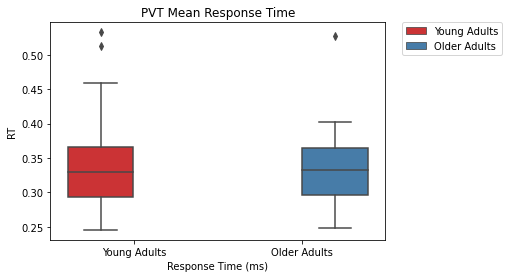

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=pvt_results[(pvt_results['RT'] < 5)], y = 'RT', x = 'Group', palette = 'Set1', hue='Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Response Time (ms)')
plt.title('PVT Mean Response Time')
plt.savefig(results_dir + 'mean_rt.png', dpi=300) 

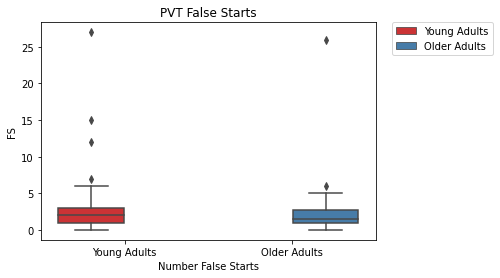

In [40]:
sns.boxplot(data=pvt_results[(pvt_results['RT'] < 5)], y = 'FS', x = 'Group', palette = 'Set1', hue='Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Number False Starts')
plt.title('PVT False Starts')
plt.savefig(results_dir + 'false_starts.png', dpi=300) 

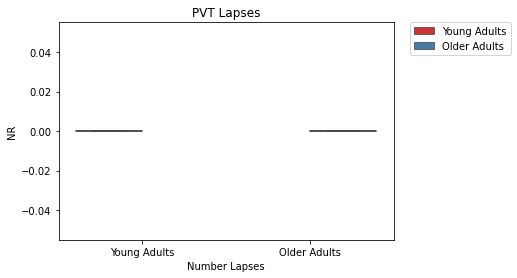

In [41]:
sns.boxplot(data=pvt_results[(pvt_results['RT'] < 5)], y = 'NR', x = 'Group', palette = 'Set1', hue='Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Number Lapses')
plt.title('PVT Lapses')
plt.savefig(results_dir + 'pvt_nrs.png', dpi=300)